# Dynex - Hello World

In [1]:
import dynex
import dimod
from pyqubo import Array

## Verify Version of Dynex SDK

In [2]:
dynex.__version__

'0.1.17'

## Test your configuration

Successful run is required to start sampling with the Dynex SDK

In [3]:
dynex.test()

[DYNEX] TEST: dimod BQM construction...
[DYNEX] PASSED
[DYNEX] TEST: Dynex Sampler object...
[DYNEX] PASSED
[DYNEX] TEST: submitting sample file...
[DYNEX] PASSED
[DYNEX] TEST: retrieving samples...
[DYNEX] PASSED
[DYNEX] TEST RESULT: ALL TESTS PASSED


## View your API acccount

In [4]:
dynex.account_status()

ACCOUNT: y3ti@y3ti.uk
API SUCCESSFULLY CONNECTED TO DYNEX
-----------------------------------
*** PAY-PER-USE PRICING ***
-----------------------------------
ACCOUNT LIMITS:
MAXIMUM NUM_READS: 100,000
MAXIMUM ANNEALING_TIME: 10,000
MAXIMUM JOB DURATION: 60 MINUTES
COMPUTE:
AVAILABLE BALANCE: 161.541342837 DNX


## Create a simple QUBO formulation

In [5]:
N = 15
K = 3
numbers = [4.8097315016016315, 4.325157567810298, 2.9877429101815127,
           3.199880179616316, 0.5787939511978596, 1.2520928214246918,
           2.262867466401502, 1.2300003067401255, 2.1601079352817925,
           3.63753899583021, 4.598232793833491, 2.6215815162575646,
           3.4227134835783364, 0.28254151584552023, 4.2548151473817075]

q = Array.create('q', N, 'BINARY')
H = sum(numbers[i] * q[i] for i in range(N)) + 5.0 * (sum(q) - K)**2
model = H.compile()
Q, offset = model.to_qubo(index_label=True)

In [6]:
# BQM from QUBO:
bqm = dimod.BinaryQuadraticModel.from_qubo(Q, offset)

## Sample on Dynex

In [7]:
model = dynex.BQM(bqm);
sampler = dynex.DynexSampler(model, mainnet=False, description='Dynex Hello World', bnb=False);
sampleset = sampler.sample(num_reads=5000, annealing_time=200, debugging=False);
print('Result:')
print(sampleset)

[DYNEX] SAMPLER INITIALISED
[DYNEX|TESTNET] *** WAITING FOR READS ***
╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬───────────────────────────┬────────────┬─────────┬────────────────╮
│   DYNEXJOB │   QUBITS │   QUANTUM GATES │   BLOCK FEE │ ELAPSED   │ WORKERS READ              │ CIRCUITS   │ STEPS   │ GROUND STATE   │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼───────────────────────────┼────────────┼─────────┼────────────────┤
│         -1 │       23 │             128 │           0 │           │ *** WAITING FOR READS *** │            │         │                │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴───────────────────────────┴────────────┴─────────┴────────────────╯

[DYNEX] FINISHED READ AFTER 0.37 SECONDS
[DYNEX] SAMPLESET READY
Result:
   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14   energy num_oc.
0  0  1  0  0  0  0  0  1  0  0  1  0  0  0  0 2.091336       1
['BINARY', 1 rows, 1 samples, 15 varia

## Sample on Dynex using clones

In [8]:
model = dynex.BQM(bqm);
sampler = dynex.DynexSampler(model, mainnet=True, description='Dynex Hello World', bnb=False);
sampleset = sampler.sample(num_reads=20000, annealing_time=1000, clones=4, debugging=False);
print('Result:')
print(sampleset)

╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬───────────────────────────┬────────────┬─────────┬────────────────╮
│ DYNEXJOB   │   QUBITS │   QUANTUM GATES │ BLOCK FEE   │ ELAPSED   │ WORKERS READ              │ CIRCUITS   │ STEPS   │ GROUND STATE   │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼───────────────────────────┼────────────┼─────────┼────────────────┤
│            │       23 │             128 │             │           │ *** WAITING FOR READS *** │            │         │                │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴───────────────────────────┴────────────┴─────────┴────────────────╯

[DYNEX] Clone 2 finished
[DYNEX] Clone 0 finished
[DYNEX] Clone 3 finished
[DYNEX] Clone 1 finished
Result:
   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14   energy num_oc.
0  0  1  0  0  0  0  0  1  0  0  1  0  0  0  0 2.091336       4
['BINARY', 1 rows, 4 samples, 15 variables]


## Draw Sampleset

In [9]:
import matplotlib.pyplot as plt
import numpy as np

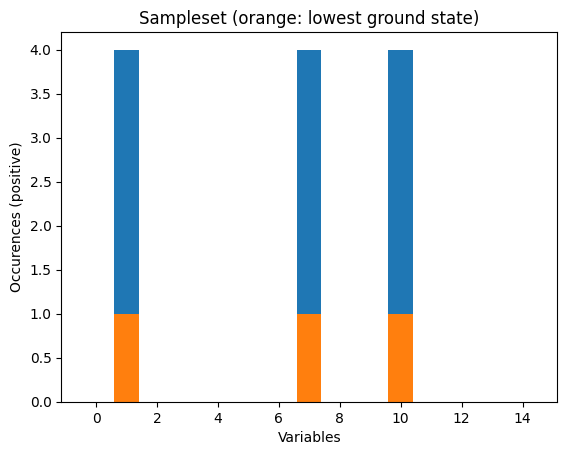

In [10]:
# generate data:
data = np.zeros(len(sampleset.variables)) 
for s in sampleset.record: #s[0] samples [1] energy [2] num_oc
    for i in range(0,len(s[0])):
        data[i] += ( s[0][i] * s[2] ); # weighted by num_oc

plt.bar(sampleset.variables, data)
plt.bar(sampleset.variables, sampleset.first.sample.values())
plt.xlabel("Variables")
plt.ylabel("Occurences (positive)")
plt.title("Sampleset (orange: lowest ground state)")
plt.show() 